In [65]:
from scipy.stats import skew,kurtosis,norm,skewtest,kurtosistest
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

In [66]:
!pip install yfinance

You should consider upgrading via the 'c:\users\sherice\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.



In [67]:
import pandas as pd
import numpy as np
import yfinance
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 7]

plt.rc('font', size=14) 

In [68]:
name = 'VFIAX'
ticker = yfinance.Ticker(name)
df = ticker.history(interval="1d",start="2015-12-22",end="2020-12-22")
x = df['Close']


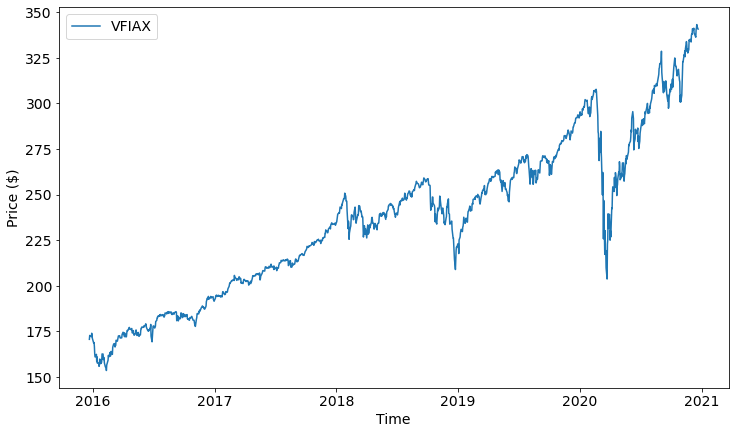

In [69]:
plt.plot(x,label="VFIAX")
plt.xlabel("Time")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

In [112]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.0,1259.000000,1259.0
mean,236.481023,236.481023,236.481023,236.481023,0.0,0.019233,0.0
std,43.333498,43.333498,43.333498,43.333498,0.0,0.152893,0.0
min,153.491074,153.491074,153.491074,153.491074,0.0,0.000000,0.0
25%,202.887344,202.887344,202.887344,202.887344,0.0,0.000000,0.0
50%,238.621185,238.621185,238.621185,238.621185,0.0,0.000000,0.0
75%,263.316742,263.316742,263.316742,263.316742,0.0,0.000000,0.0
max,343.289246,343.289246,343.289246,343.289246,0.0,1.456000,0.0


In [70]:
returns = x.pct_change(1).dropna()

In [71]:
returns[0:10]

Date
2015-12-23    0.012503
2015-12-24   -0.001577
2015-12-28   -0.002210
2015-12-29    0.010866
2015-12-30   -0.007149
2015-12-31   -0.009408
2016-01-04   -0.015068
2016-01-05    0.001993
2016-01-06   -0.012741
2016-01-07   -0.023688
Name: Close, dtype: float64

In [72]:
(x[1]-x[0])/x[0]

0.012503291634525526

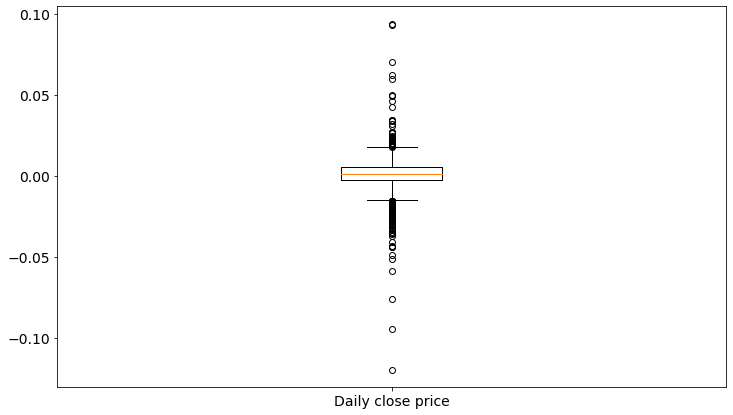

In [73]:
plt.boxplot(returns,labels=["Daily close price"])


plt.show()

In [74]:
returns.describe()

count    1258.000000
mean        0.000624
std         0.012130
min        -0.119766
25%        -0.002878
50%         0.000775
75%         0.005410
max         0.093983
Name: Close, dtype: float64

In [75]:
np.mean(returns)

0.000624271438804366

In [76]:
np.median(returns)

0.0007750217462083597

In [77]:
np.std(returns)

0.012125137825088773

In [78]:
np.quantile(returns,0.5)

0.0007750217462083597

In [79]:
skew(returns)

-0.7223495985132673

In [80]:
skewtest(returns)

SkewtestResult(statistic=-9.49761987589704, pvalue=2.147422922360427e-21)

In [81]:
kurtosis(returns)

20.345277728745273

In [82]:
kurtosistest(returns)

KurtosistestResult(statistic=18.046876565196975, pvalue=8.348014634720489e-73)

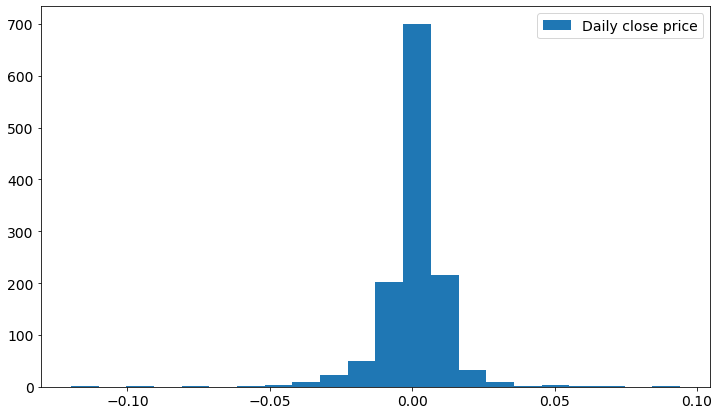

In [83]:
plt.hist(returns,bins="rice",label="Daily close price")

plt.legend()
plt.show()

In [84]:
t = np.linspace(0.01,0.99,1000)

q1 = np.quantile(returns,t)

q2 = norm.ppf(t,loc=np.mean(returns),scale=np.std(returns))

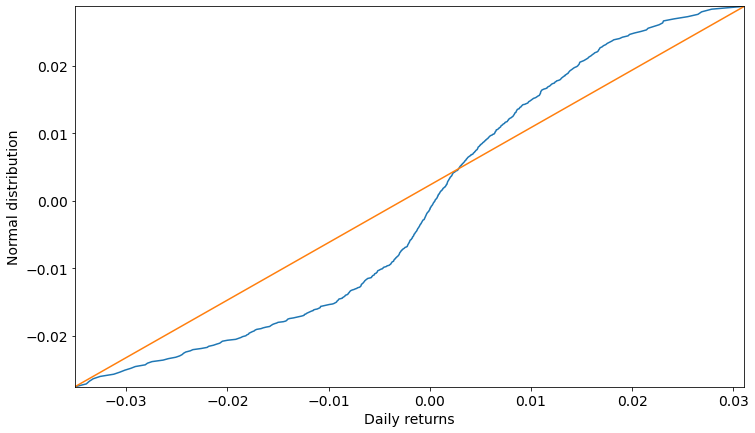

In [85]:
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])

plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))

plt.xlabel("Daily returns")
plt.ylabel("Normal distribution")
plt.show()

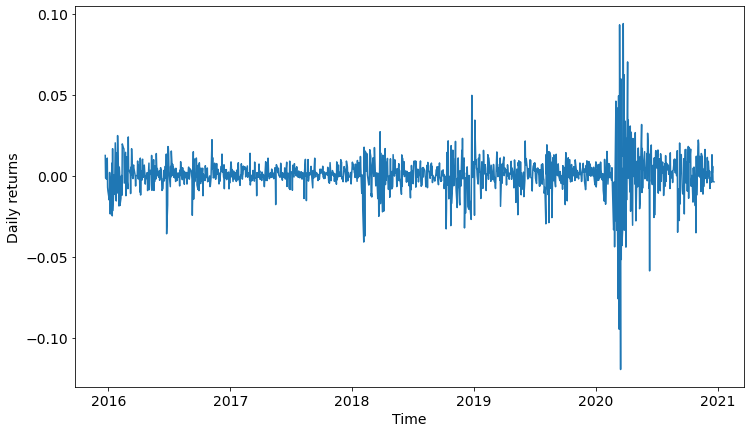

In [86]:
plt.plot(returns)
plt.xlabel("Time")
plt.ylabel("Daily returns")

plt.show()

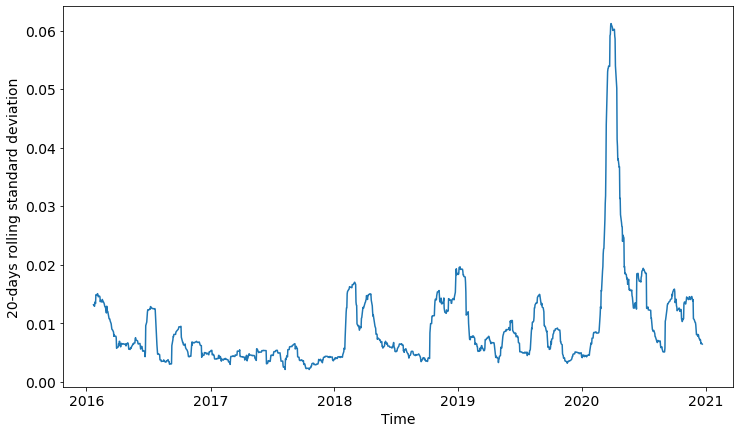

In [87]:
plt.plot(returns.rolling(20).std())
plt.xlabel("Time")
plt.ylabel("20-days rolling standard deviation")
plt.show()

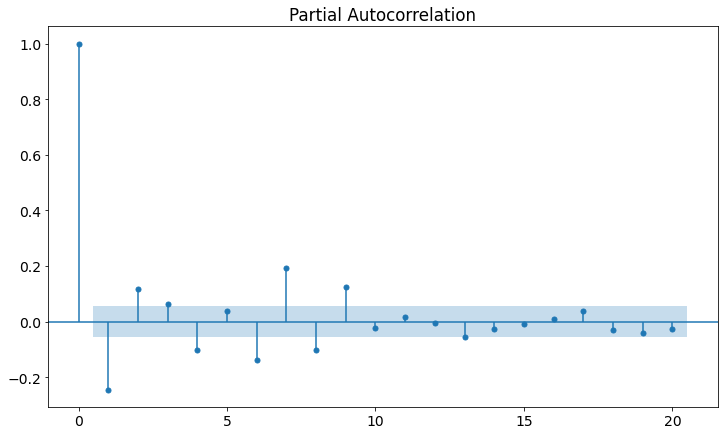

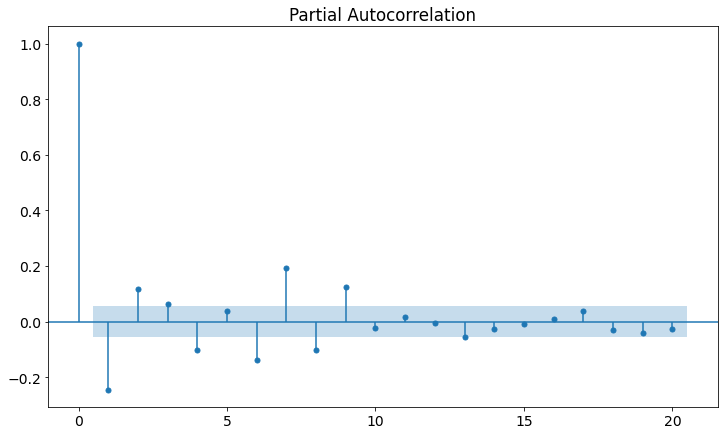

In [88]:
plot_pacf(returns,lags=20)

In [89]:
import yfinance as yf

vfiax = yf.Ticker("VFIAX")

# get stock info
vfiax.info

# get historical market data
hist = vfiax.history(interval="1d",start="2015-12-22",end="2020-12-22")

# show actions (dividends)
vfiax.actions

# show dividends
vfiax.dividends



Date
2016-03-18    1.015
2016-06-20    0.959
2016-09-12    0.890
2016-12-21    1.305
2017-03-21    1.005
2017-06-22    1.017
2017-09-19    1.187
2017-12-22    1.192
2018-03-23    1.091
2018-06-27    1.166
2018-09-25    1.215
2018-12-14    1.281
2019-03-20    1.456
2019-06-26    1.389
2019-09-25    1.303
2019-12-20    1.433
2020-03-09    1.179
2020-06-26    1.435
2020-09-28    1.310
2020-12-21    1.386
Name: Dividends, dtype: float64

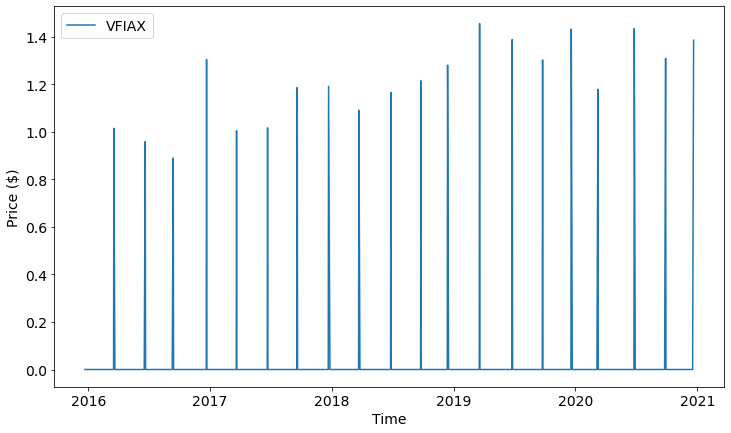

In [90]:
df = vfiax.history(interval="1d",start="2015-12-22",end="2020-12-22")
x = df['Dividends']

plt.plot(x,label="VFIAX")
plt.xlabel("Time")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

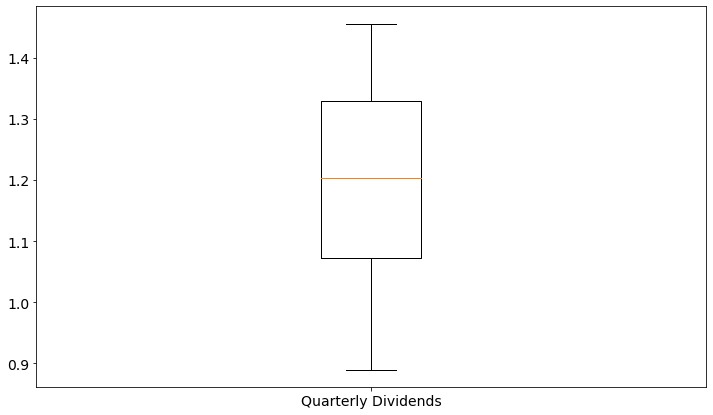

In [106]:
plt.boxplot(vfiax.dividends,labels=["Quarterly Dividends"])


plt.show()

In [107]:
vfiax.dividends.describe()

count    20.000000
mean      1.210700
std       0.171254
min       0.890000
25%       1.072500
50%       1.203500
75%       1.329000
max       1.456000
Name: Dividends, dtype: float64

In [91]:
np.mean(vfiax.dividends)

1.2106999999999997

In [92]:
np.median(vfiax.dividends)

1.2035

In [93]:
np.std(vfiax.dividends)

0.1669173747696746

In [94]:
np.quantile(vfiax.dividends,0.5)

1.2035

In [95]:
from scipy.stats import skew
skew(vfiax.dividends)

-0.24958982308655256

In [96]:
from scipy.stats import skewtest
skewtest(vfiax.dividends)

SkewtestResult(statistic=-0.5575923555834988, pvalue=0.5771227776814379)

In [97]:
from scipy.stats import kurtosis
kurtosis(vfiax.dividends)

-1.0490263247707383

In [98]:
from scipy.stats import kurtosistest
kurtosistest(vfiax.dividends)

KurtosistestResult(statistic=-1.2476655112287447, pvalue=0.21215357650631272)

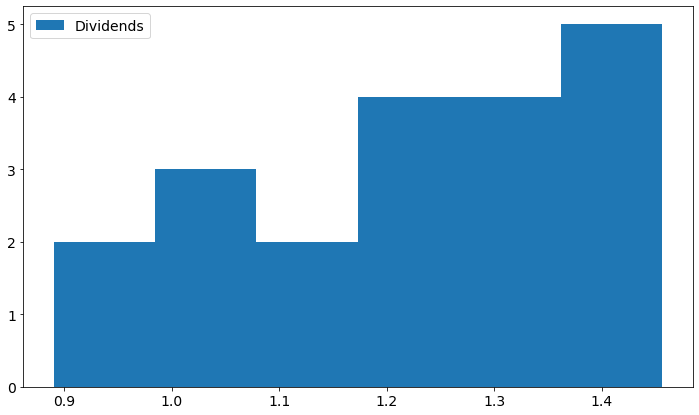

In [99]:
plt.hist(vfiax.dividends,bins="rice",label="Dividends")

plt.legend()
plt.show()

In [100]:
from scipy.stats import norm

t = np.linspace(0.01,0.99,1000)

q1 = np.quantile(vfiax.dividends,t)

q2 = norm.ppf(t,loc=np.mean(vfiax.dividends),scale=np.std(vfiax.dividends))

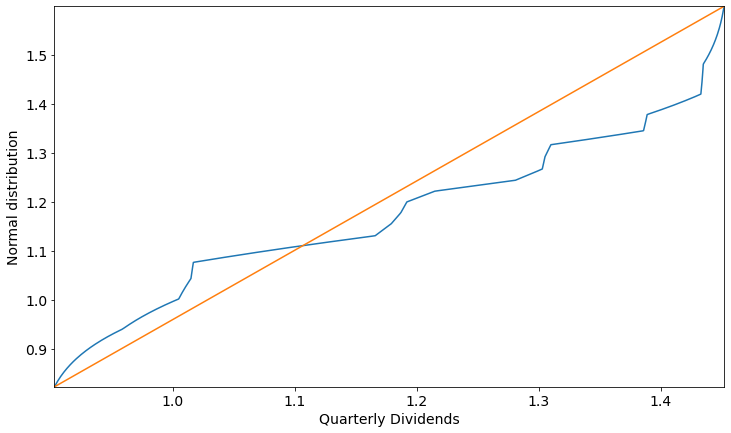

In [101]:
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])

plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))

plt.xlabel("Quarterly Dividends")
plt.ylabel("Normal distribution")
plt.show()

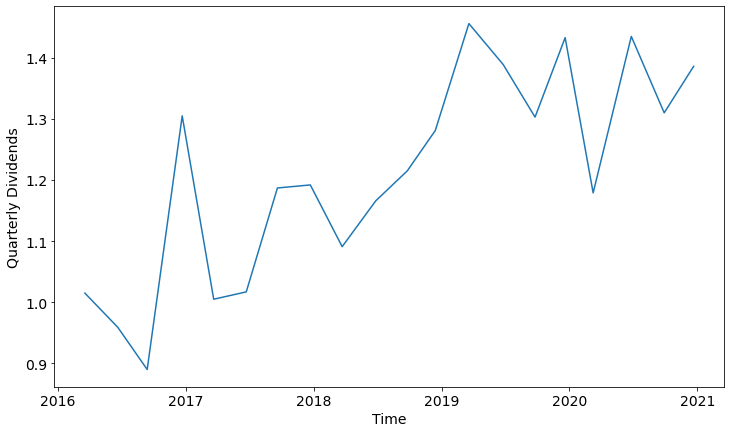

In [102]:
plt.plot(vfiax.dividends)
plt.xlabel("Time")
plt.ylabel("Quarterly Dividends")

plt.show()

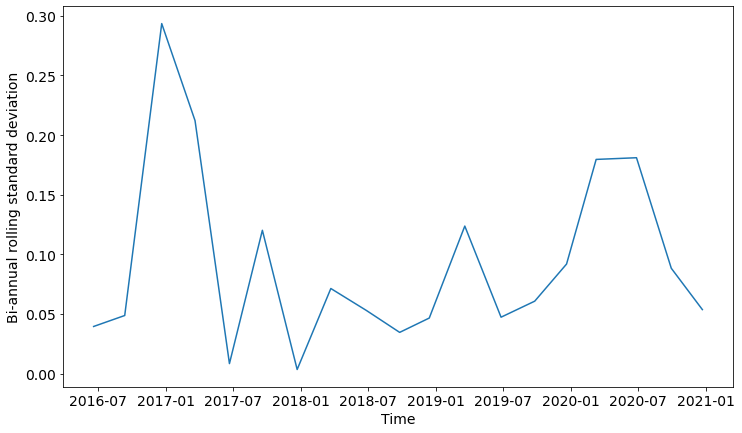

In [103]:
plt.plot(vfiax.dividends.rolling(2).std())
plt.xlabel("Time")
plt.ylabel("Bi-annual rolling standard deviation")
plt.show()

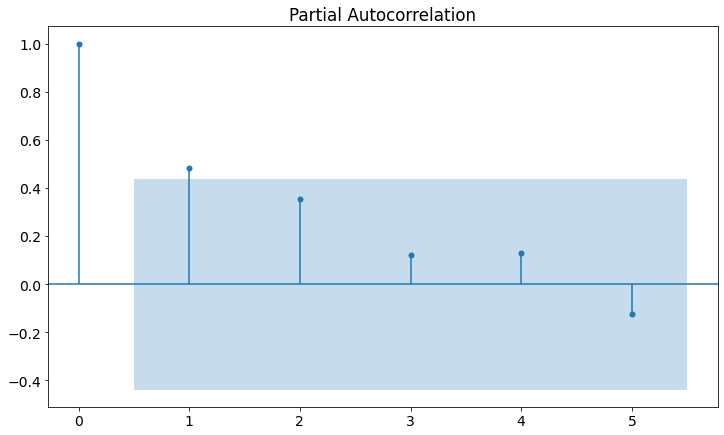

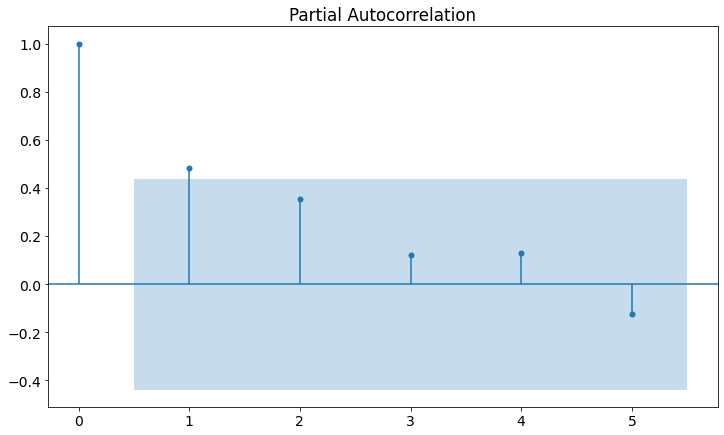

In [104]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
plot_pacf(vfiax.dividends,lags=5)

In [105]:
name = 'VFIAX'
ticker = yfinance.Ticker(name)
df = ticker.history(interval="1d",start="2015-12-22",end="2020-12-22")
x = df['Close']

np.mean(df)

Open            236.481023
High            236.481023
Low             236.481023
Close           236.481023
Volume            0.000000
Dividends         0.019233
Stock Splits      0.000000
dtype: float64